<a href="https://colab.research.google.com/github/7692TITO/EDA-CAPSTONE-PROJECT/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

1. when the best time of year to book a hotel room is? 
2. the optimal length of stay in order to get the best daily rate? 
3. What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? 
4.factors that govern the bookings.

In [ ]:
import numpy as np                              # Import all the libraries required for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive                 # Mount the Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings (1).csv')   # Syntax to read the csv file
                                                                        # df is the Dataframe name given to our dataset

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,40.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,40.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,40.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [ ]:
df['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64

## **1. Data Cleaning**

 a) Checking for data type

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
df['reservation_status_data'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d') #change the datatype of reservation status date to datetime

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

b) **Checking for missing values**

In [ ]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
previous_bookings_not_canceled         0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
reserved_room_type                     0
is_repeated_guest                      0
previous_cancellations                 0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults          

The following coulmns name company , agent , country  , children has null values in it.

b) **Filling the null values with adequate values**

In [ ]:
df['agent'].fillna(9 , inplace = True)    # fill null  value with mode so that to prevent outliers 
df['country'].fillna('Not defined',inplace = True) # we use Not defined here because country is a object data type
df['children'].fillna(0 , inplace = True)
df['company'].fillna(40 , inplace = True)  # fill null  value with mode so that to prevent outliers
df.shape

(119390, 33)

In [ ]:
df.isna().sum()      # checking again to see whether all null values are filled or not

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

c) **Check for duplicate value rows**

In [ ]:
df.duplicated().value_counts()

False    87395
True     31995
dtype: int64

We can see from above data that we have 31994 rows with duplicate values.We will remove duplicate values now

In [ ]:
df.drop_duplicates(inplace=True)    # syntax to remove duplicate values

In [ ]:
df.duplicated().value_counts()      # Hence we have removed all the duplicate values from the row

False    87395
dtype: int64

In [ ]:
df.shape

(87395, 33)

## **Exploratory Data Analysis**

## **a) Univariate Analysis**

In [ ]:
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'reservation_status_data'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87395 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87395 non-null  object        
 1   is_canceled                     87395 non-null  int64         
 2   lead_time                       87395 non-null  int64         
 3   arrival_date_year               87395 non-null  int64         
 4   arrival_date_month              87395 non-null  object        
 5   arrival_date_week_number        87395 non-null  int64         
 6   arrival_date_day_of_month       87395 non-null  int64         
 7   stays_in_weekend_nights         87395 non-null  int64         
 8   stays_in_week_nights            87395 non-null  int64         
 9   adults                          87395 non-null  int64         
 10  children                        87395 non-null  float64       
 11  b

### 1. **The most demanded hotel by the customer**

In [ ]:
Hotel_most_preferred = (df['hotel'].value_counts()/df['hotel'].size)*100    # Showing the data in percentage
Hotel_most_preferred

City Hotel      61.132788
Resort Hotel    38.867212
Name: hotel, dtype: float64

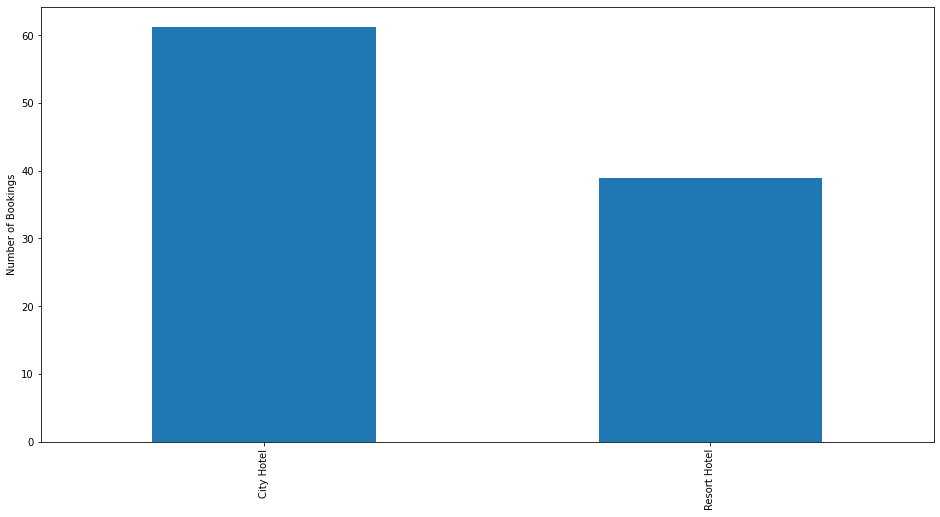

In [ ]:
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (16,8)
Hotel_most_preferred.plot(kind='bar')
plt.ylabel('Number of Bookings')
plt.show()

Conclusion

In [ ]:
# We can conclude from the above given bar plot that the most preferred hotel for the Customer is a City Hotel compared to a Resort Hotel

### 2. **From which country the most number of booking of hotel rooms is coming**

In [ ]:
Country_of_origin = df['country'].value_counts()[:5]

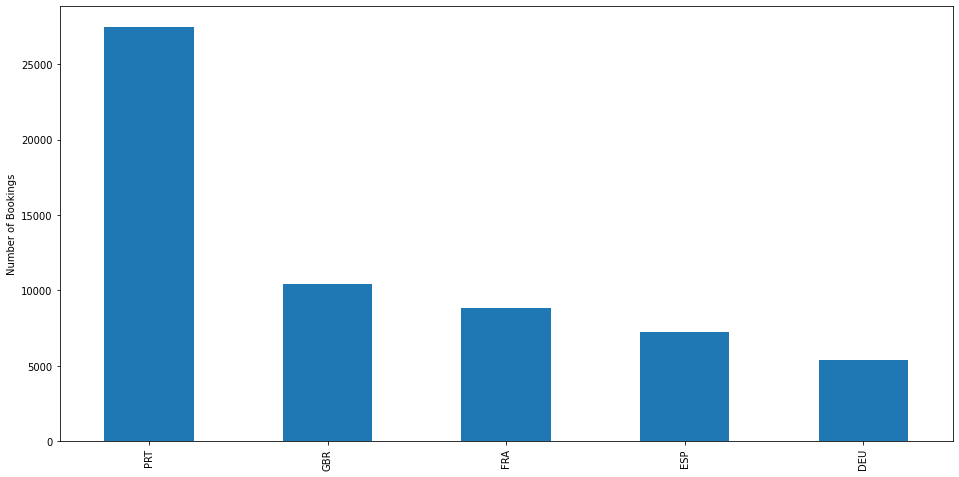

In [ ]:
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (16,8)
Country_of_origin.plot(kind='bar')
plt.ylabel('Number of Bookings')
plt.show()

Conclusion

In [ ]:
# We can conclude from the above bar plot that the most number of people who have done the hotel bookings are from Portugal.In second stands the Great Britain and third is France

### 3. **The Market Segment with highest booking**





In [ ]:
market_players = df['market_segment'].value_counts()
market_players

Online TA        51617
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

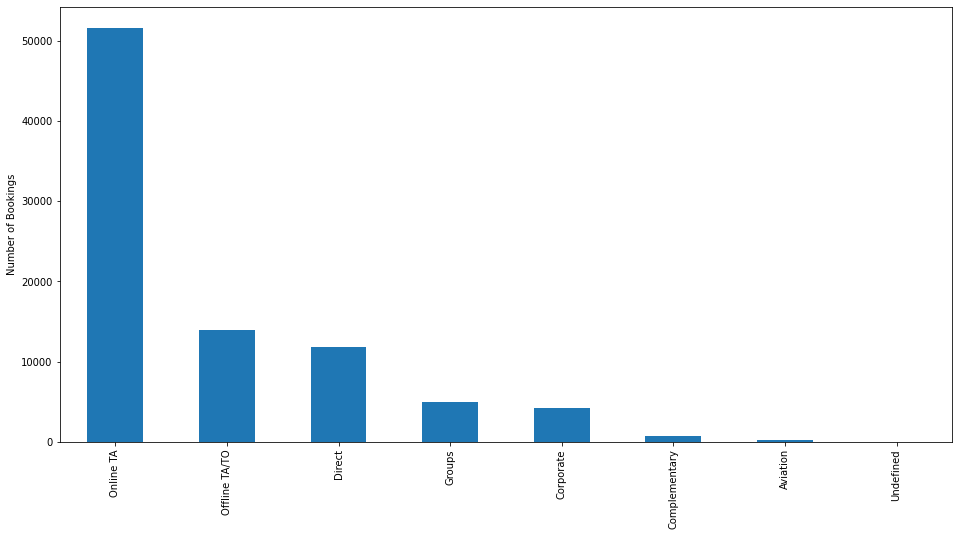

In [ ]:
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (16,8)
market_players.plot(kind='bar')
plt.ylabel('Number of Bookings')
plt.show()

Conclusion

### 4. The most successful Distribution Channel to book the hotel

In [ ]:
distribution_channels = (df['distribution_channel'].value_counts()/df['distribution_channel'].size)*100

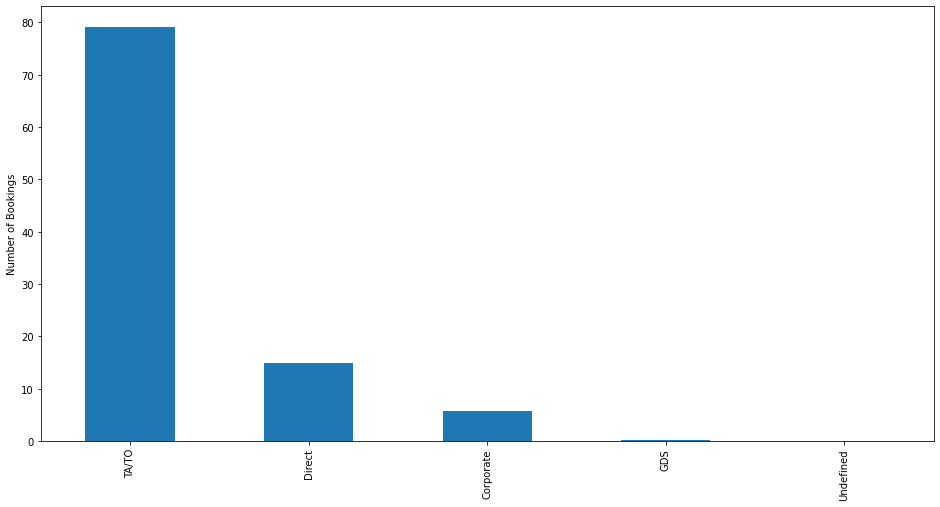

In [ ]:
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (16,8)
distribution_channels.plot(kind='bar')
plt.ylabel('Number of Bookings')
plt.show()

Conclusion

### 5. **The agent id with most number of bookings**

In [ ]:
agent = df['agent'].value_counts()[:28]
agent

9.0      40951
240.0    13028
14.0      3349
7.0       3300
250.0     2779
241.0     1644
28.0      1502
Name: agent, dtype: int64

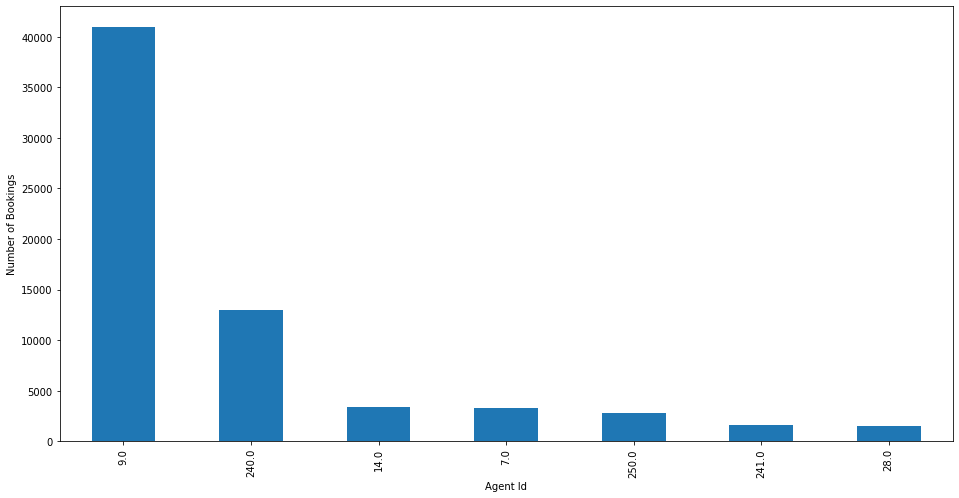

In [ ]:
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (16,8)
agent.plot(kind='bar')
plt.ylabel('Number of Bookings')
plt.xlabel('Agent Id')
plt.show()

## 6. **Most preferred meal by customer**

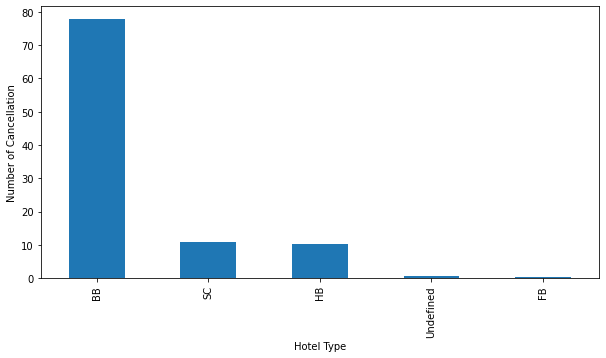

In [ ]:
most_preferred_meal = (df['meal'].value_counts()/df['meal'].size)*100
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (10,5)
most_preferred_meal.plot(kind='bar')
plt.ylabel('Number of Cancellation')
plt.xlabel('Hotel Type')
plt.show()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.dtypes

### 7. **The most preferred months by the customers**

In [ ]:
months = df['arrival_date_month'].value_counts()

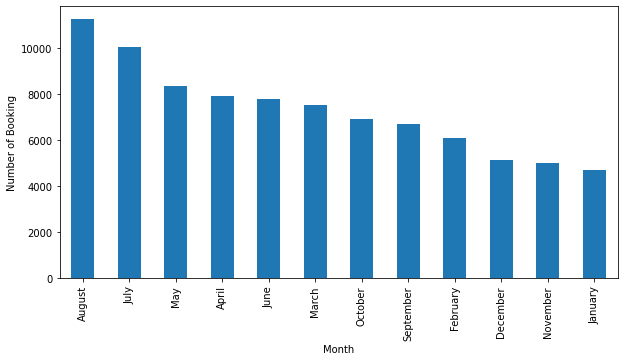

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
months.plot(kind='bar')
plt.ylabel('Number of Booking')
plt.xlabel('Month')
plt.show()

### 8. The most demanded room type by customer

In [ ]:
room_type = (df['assigned_room_type'].value_counts()/df['assigned_room_type'].size)*100

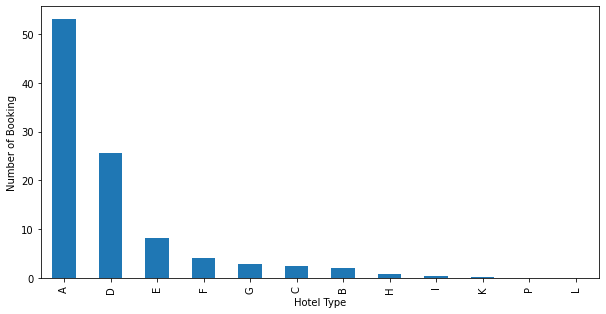

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
room_type.plot(kind='bar')
plt.ylabel('Number of Booking')
plt.xlabel('Hotel Type')
plt.show()

## **Bivariable Analysis**

### 1. Comparing the Cancellation Rate in different hotel type

In [ ]:
cond = df[df['is_canceled']==1]
stats =  (cond['hotel'].value_counts()/cond['hotel'].size)*100
stats

City Hotel      66.801249
Resort Hotel    33.198751
Name: hotel, dtype: float64

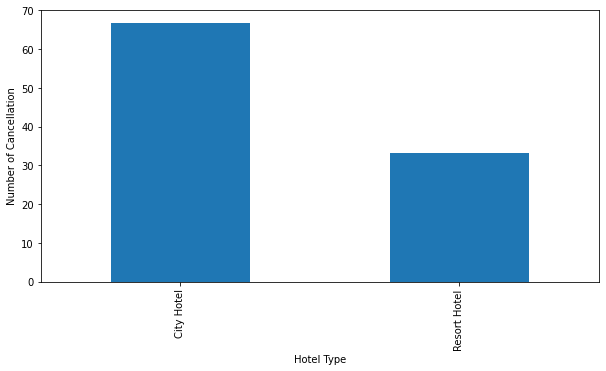

In [ ]:
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (10,5)
stats.plot(kind='bar')
plt.ylabel('Number of Cancellation')
plt.xlabel('Hotel Type')
plt.show()

### 2. **Optimal months to visit in different years**

In [ ]:
best_time_2015 = df[df.arrival_date_year == 2015]['arrival_date_month'].value_counts()

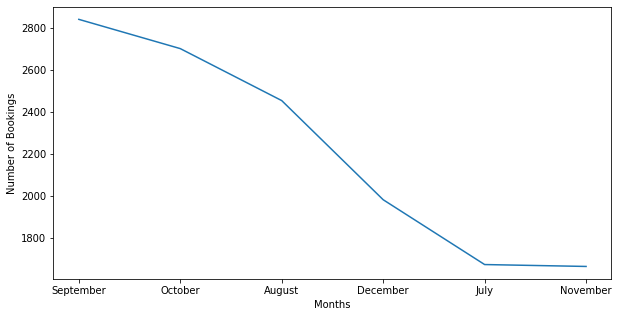

In [ ]:
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (10,5)
best_time_2015.plot()
plt.ylabel('Number of Bookings')
plt.xlabel('Months')
plt.show()

In [ ]:
best_time_2016 = df[df.arrival_date_year == 2016]['arrival_date_month'].value_counts()

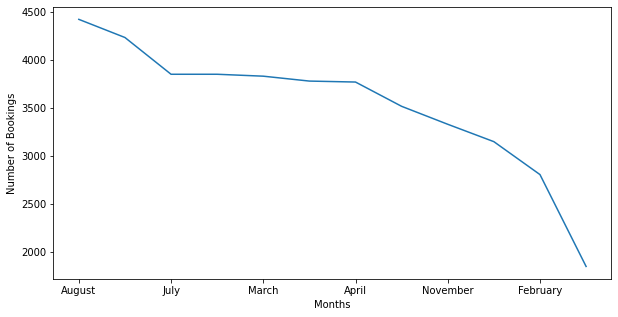

In [ ]:
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (10,5)
best_time_2016.plot()
plt.ylabel('Number of Bookings')
plt.xlabel('Months')
plt.show()

In [ ]:
best_time_2017 = df[df.arrival_date_year == 2017]['arrival_date_month'].value_counts()

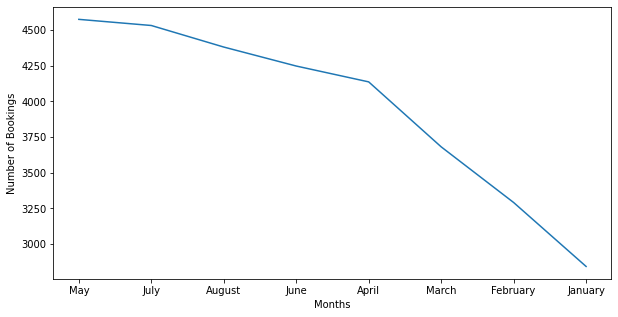

In [ ]:
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(best_time_2017)

plt.ylabel('Number of Bookings')
plt.xlabel('Months')
plt.show()

In [ ]:
df.head()

### 3. **Comparing the hotel based on mean lead time**

In [ ]:
lead_time = df.groupby('hotel')['lead_time'].mean()

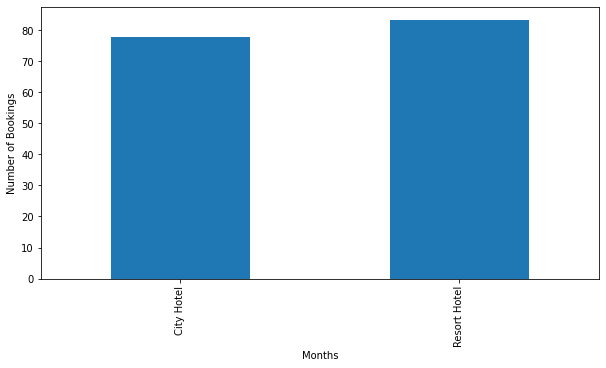

In [ ]:
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (10,5)
lead_time.plot(kind='bar')

plt.ylabel('Number of Bookings')
plt.xlabel('Months')
plt.show()

Conclusion

Customer who plans to go in Resort Hotel plans very early


### 4.Hotel with most revenue

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,40.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,40.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,40.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
Average_daily_rate = df.groupby('hotel')['adr'].mean()

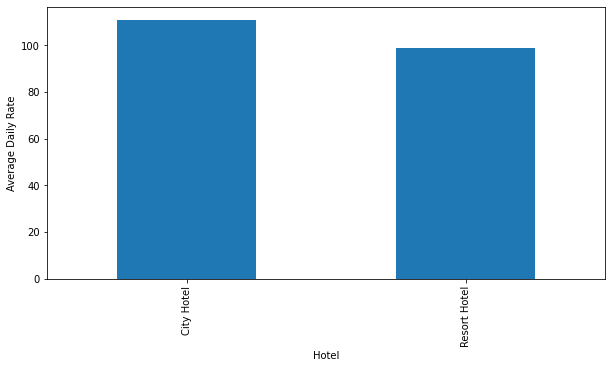

In [ ]:
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (10,5)
Average_daily_rate.plot(kind='bar')

plt.ylabel('Average Daily Rate')
plt.xlabel('Hotel')
plt.show()

## 5. **Comparing hotel with its average waiting days**

In [ ]:
waiting_days = df.groupby('hotel')['days_in_waiting_list'].mean()

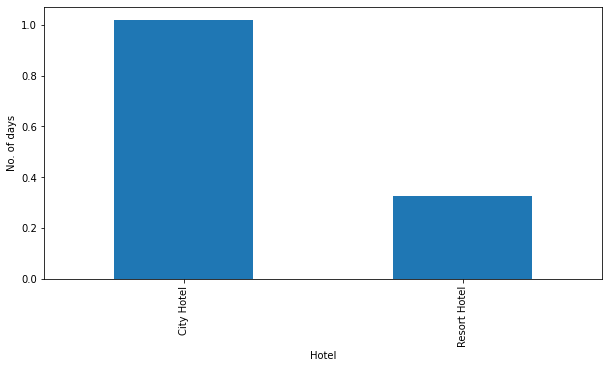

In [ ]:
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (10,5)
waiting_days.plot(kind='bar')

plt.ylabel('No. of days')
plt.xlabel('Hotel')
plt.show()

### 6. **Comparing Customer Type with its average waiting days**

In [ ]:
waiting_days1 = df.groupby('customer_type')['days_in_waiting_list'].mean()

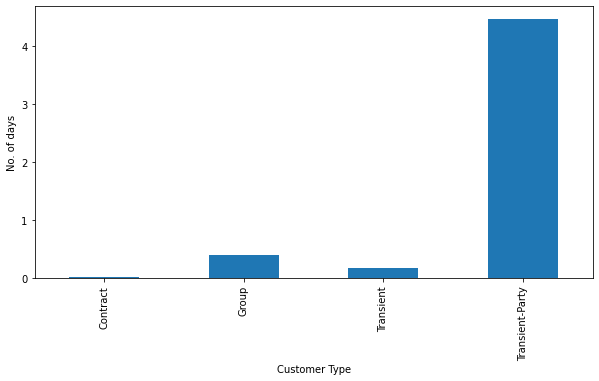

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
waiting_days1.plot(kind='bar')

plt.ylabel('No. of days')
plt.xlabel('Customer Type')
plt.show()

### 7. Comparing Average Daily rate based on Customer Type

In [ ]:
customer = df.groupby('customer_type')['adr'].mean()

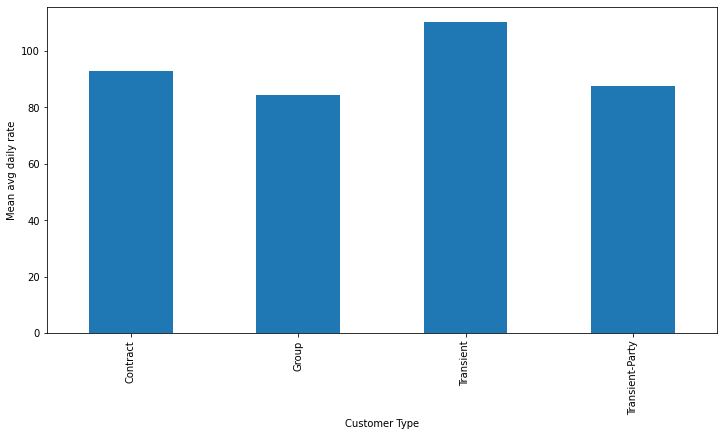

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
customer.plot(kind = 'bar')
plt.ylabel('Mean avg daily rate')
plt.xlabel('Customer Type')
plt.show()

### 8. **Comparing adr in different month**

In [ ]:
mon = df.groupby('arrival_date_month')['adr'].mean()

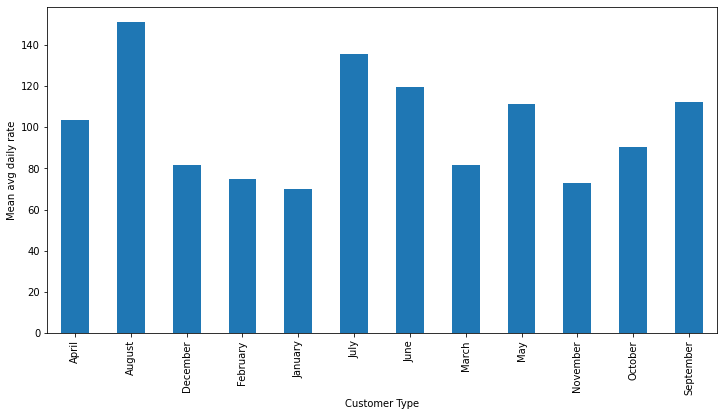

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
mon.plot(kind = 'bar')
plt.ylabel('Mean avg daily rate')
plt.xlabel('Customer Type')
plt.show()

### 9. **The Hotel with most number of Special Request**

In [ ]:
req = df.groupby('hotel')['total_of_special_requests'].mean()

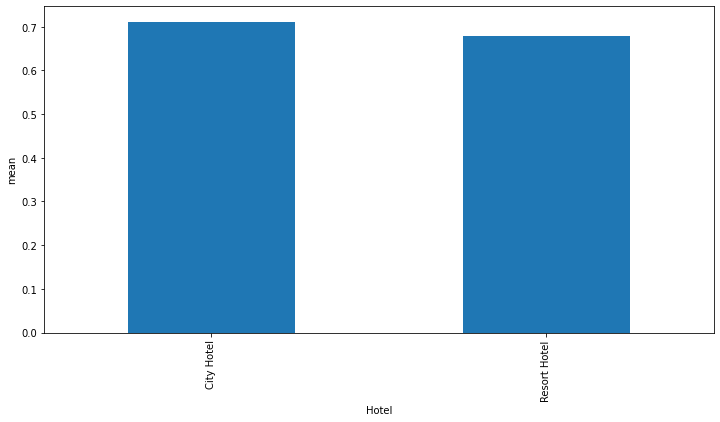

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
req.plot(kind = 'bar')
plt.ylabel('mean')
plt.xlabel('Hotel')
plt.show()

### 10. The Customer Type with the most number of special Request

In [ ]:
df['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5])

In [ ]:
req1 = df.groupby('customer_type')['total_of_special_requests'].mean()

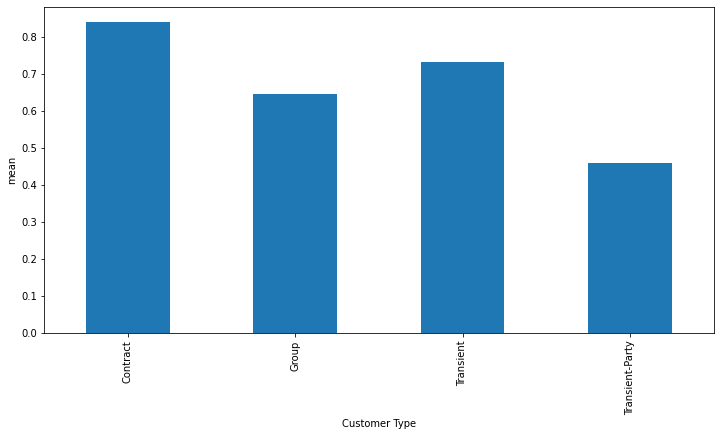

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
req1.plot(kind = 'bar')
plt.ylabel('mean')
plt.xlabel('Customer Type')
plt.show()

### 11. The Market Segment with highest special request

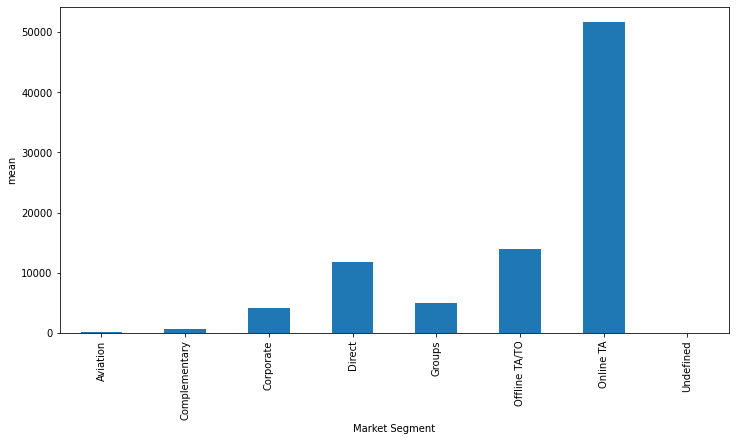

In [ ]:
request_channels = df.groupby(['market_segment'])['total_of_special_requests'].count()
plt.rcParams['figure.figsize'] = (12,6)
request_channels.plot(kind = 'bar')
plt.ylabel('mean')
plt.xlabel('Market Segment')
plt.show()

### 12. **The month with highest lead time**

In [ ]:
lead = df.groupby(['arrival_date_month'])['lead_time'].mean()

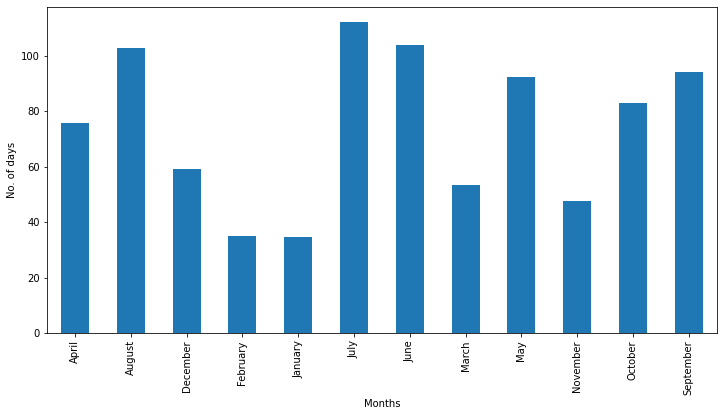

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
lead.plot(kind = 'bar')
plt.ylabel('No. of days')
plt.xlabel('Months')
plt.show()

## 13.The market segment with highest lead time

In [ ]:
lead1 = df.groupby(['distribution_channel'])['lead_time'].mean()

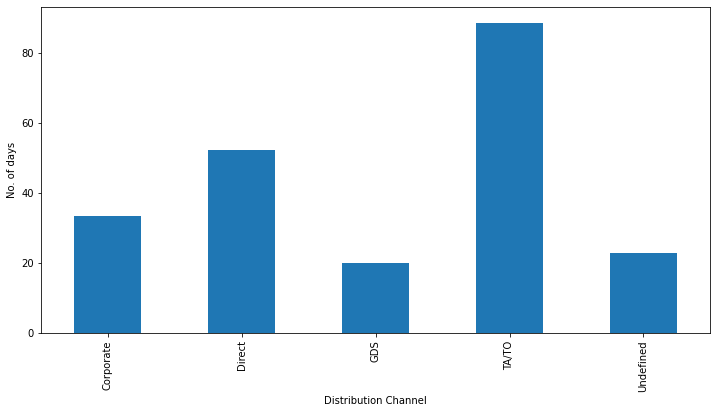

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
lead1.plot(kind = 'bar')
plt.ylabel('No. of days')
plt.xlabel('Distribution Channel')
plt.show()

### 14.**The Customer type with highest lead time**

In [ ]:
lead2 = df.groupby(['customer_type'])['lead_time'].mean()

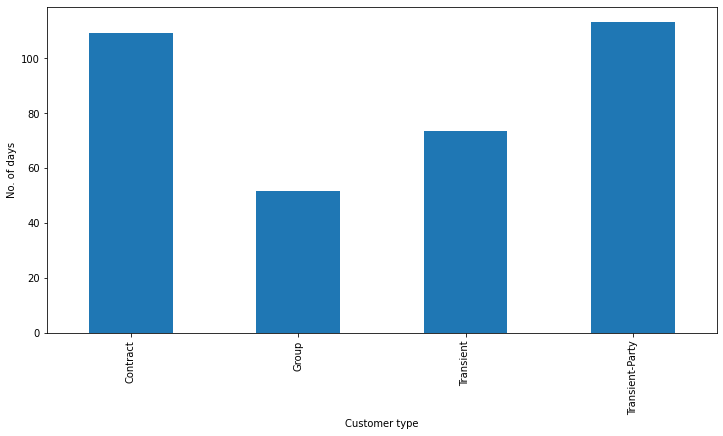

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
lead2.plot(kind = 'bar')
plt.ylabel('No. of days')
plt.xlabel('Customer type')
plt.show()

### 15. Factor affecting Cancellation rate 

a) Waiting time(days)

In [ ]:
waiting_list= df[df['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time


#fig, axes = plt.subplots(1, 2, figsize=(18, 8))
#sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
#sns.kdeplot(ax = axes[1], x = df['lead_time'], hue = df['is_canceled'])
#plt.show()

In [ ]:
waiting_list.shape

(860, 33)

In [ ]:
cancellation = (waiting_list.groupby('is_canceled')['days_in_waiting_list'].count()/ waiting_list['days_in_waiting_list'].size)*100
cancellation


is_canceled
0    65.813953
1    34.186047
Name: days_in_waiting_list, dtype: float64

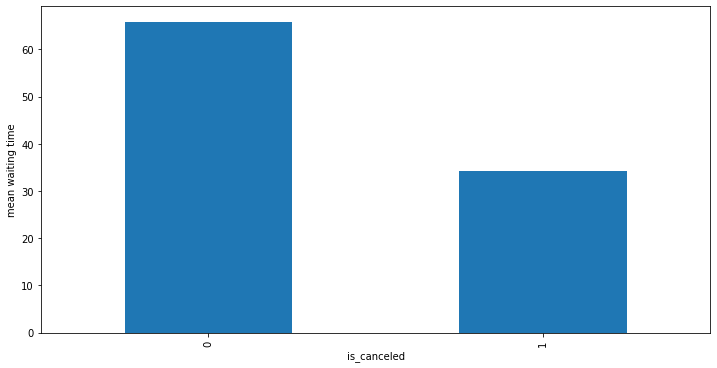

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
cancellation.plot(kind = 'bar')
plt.ylabel('mean waiting time')
plt.xlabel('is_canceled')
plt.show()

b) Lead Time

In [ ]:
cancellation1 = (df.groupby('is_canceled')['lead_time'].count()/df['lead_time'].size)*100
cancellation1

is_canceled
0    72.509869
1    27.490131
Name: lead_time, dtype: float64

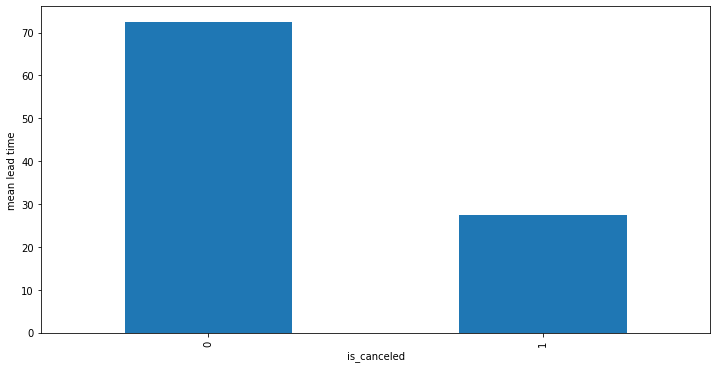

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
cancellation1.plot(kind = 'bar')
plt.ylabel('mean lead time')
plt.xlabel('is_canceled')
plt.show()

### **c) Distribution Channel with highest cancellation**

In [ ]:
cond = df[df['is_canceled']==1]
channel =  (cond['distribution_channel'].value_counts()/cond['distribution_channel'].size)*100
channel

TA/TO        89.123829
Direct        8.012487
Corporate     2.697190
GDS           0.149844
Undefined     0.016649
Name: distribution_channel, dtype: float64

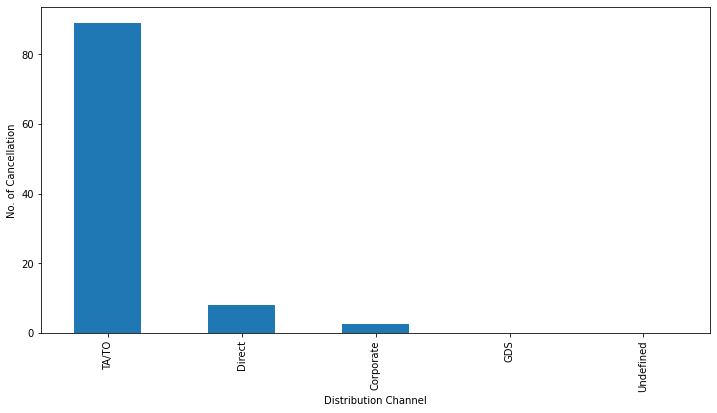

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
channel.plot(kind = 'bar')
plt.ylabel('No. of Cancellation')
plt.xlabel('Distribution Channel')
plt.show()

### d)**whether not getting allotted the same room type as demanded is the cause of cancellation fo bookings**

In [ ]:
def room(x):
  if x['assigned_room_type'] != x['reserved_room_type']:
    return 1
  else:
    return 0


In [ ]:
df['allotted_same_room'] = df.apply(lambda x : room(x) ,axis=1)

In [ ]:
x = (df['allotted_same_room'].value_counts()/df['allotted_same_room'].size)*100
x

In [ ]:
room = (df.groupby('allotted_same_room')['is_canceled'].sum()/df['allotted_same_room'].size)*100
room


allotted_same_room
0    26.784141
1     0.705990
Name: is_canceled, dtype: float64

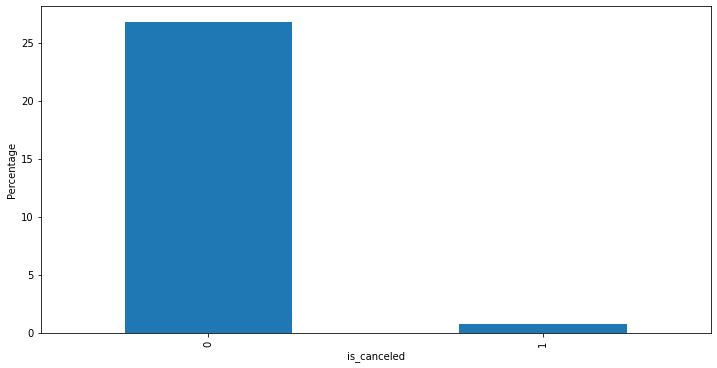

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
room.plot(kind = 'bar')
plt.ylabel('Percentage')
plt.xlabel('is_canceled')
plt.show()

1.when the best time of year to book a hotel room is?

2.the optimal length of stay in order to get the best daily rate?

3.What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

4.factors that govern the bookings.

### 16. **Factor Governing Booking**

a) Deposit type

In [ ]:
factor = df.groupby(['deposit_type'])['adr'].mean()

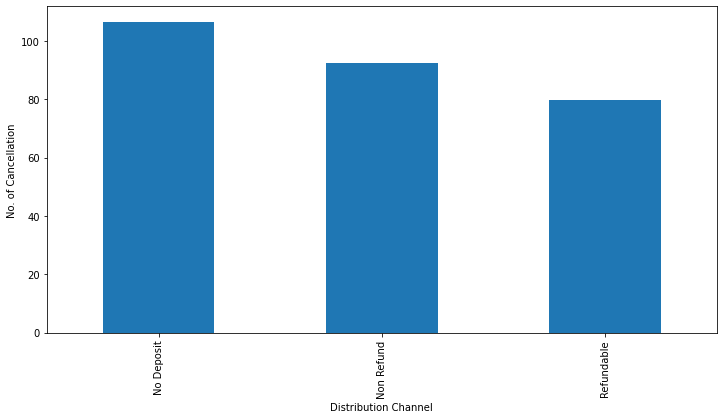

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
factor.plot(kind = 'bar')
plt.ylabel('No. of Cancellation')
plt.xlabel('Distribution Channel')
plt.show()

b) Room Type Assigned

In [ ]:
factor1 = df.groupby(['assigned_room_type'])['adr'].mean()

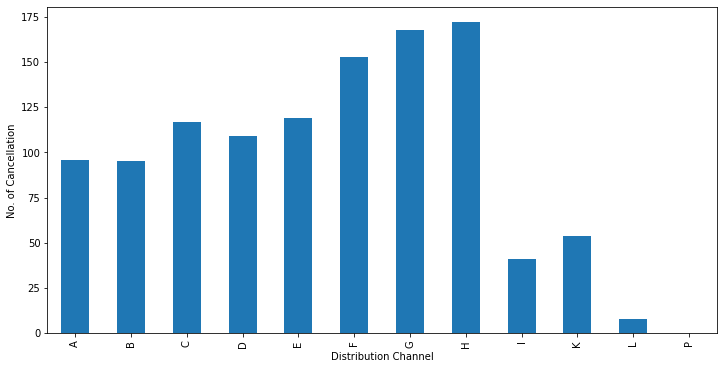

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
factor1.plot(kind = 'bar')
plt.ylabel('No. of Cancellation')
plt.xlabel('Distribution Channel')
plt.show()

c) Car Parking Space

In [ ]:
factor2 = df.groupby(['required_car_parking_spaces'])['adr'].mean()

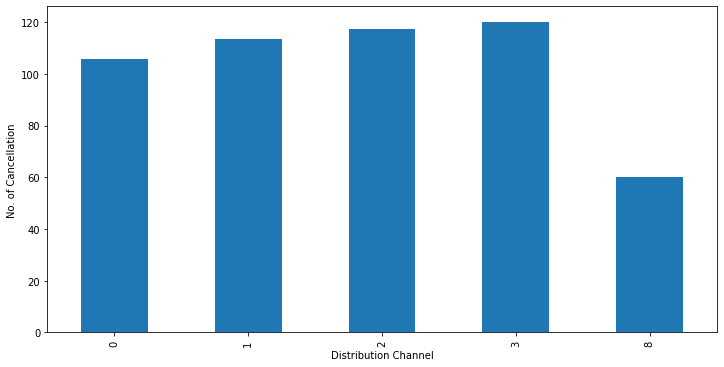

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
factor2.plot(kind = 'bar')
plt.ylabel('No. of Cancellation')
plt.xlabel('Distribution Channel')
plt.show()

1.when the best time of year to book a hotel room is?

2.the optimal length of stay in order to get the best daily rate?

3.What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

4.factors that govern the bookings.